In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings

#warnings.filterwarnings('ignore')

#Read in data and check shape
df = pd.read_csv('GTAV_Steam_Reviews.csv')
print(df.shape)
display(df.head())

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

(52099, 16)


,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,157337410,english,"Games good, But Rockstar Your a BILLION DOLLAR...",2024-02-01 16:00:22,True,0,0,True,False,False,0,9,9105,131,9105,2024-01-30 21:04:02
1,157337371,english,modders make it better and free everything,2024-02-01 15:59:57,True,0,0,True,True,False,0,1,2530,1728,2530,2024-02-01 16:01:41
2,157337210,english,great game,2024-02-01 15:57:48,True,0,0,False,False,False,0,1,281457,4523,281457,2024-02-01 00:48:38
3,157336468,english,best,2024-02-01 15:47:51,True,0,0,True,False,False,34,3,2842,431,2816,2024-02-01 15:50:12
4,157335380,english,sed,2024-02-01 15:32:26,True,0,0,True,False,False,11,2,2055,79,2021,2024-02-01 16:12:38


In [3]:
# df.dropna(subset='Fighter 2', inplace=True)
# df.dropna(subset='Date', inplace=True)

#Check for null values, data types, and duplicates
print(df.isnull().sum())
print()
print(df.dtypes)
print()
print(df.describe())
print()
print(df.duplicated().sum())

# Find and display duplicates
duplicates = df[df.duplicated()]
display(duplicates)

id                                  0
language                            0
review                            298
created                             0
voted_up                            0
votes_up                            0
comment_count                       0
steam_purchase                      0
recieved_for_free                   0
written_during_early_access         0
author_num_games_owned              0
author_num_reviews                  0
author_playtime_forever             0
author_playtime_last_two_weeks      0
author_playtime_at_review           0
author_last_played                  0
dtype: int64

id                                 int64
language                          object
review                            object
created                           object
voted_up                            bool
votes_up                           int64
comment_count                      int64
steam_purchase                      bool
recieved_for_free                   bool
written_d

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played


In [4]:
df['created'] = pd.to_datetime(df['created'])
df['created_date'] = df['created'].dt.date

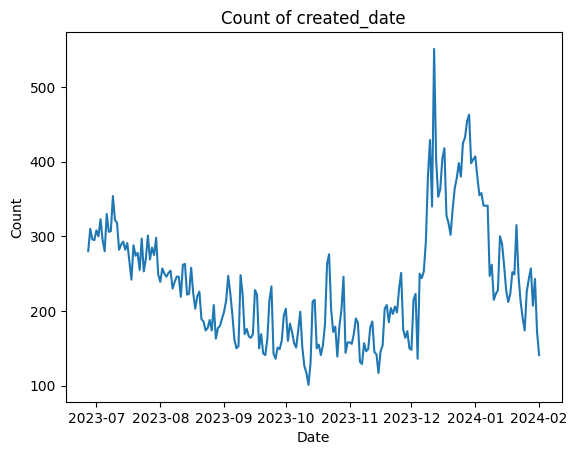

In [5]:
df['created_date'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of created_date')
plt.show()

In [6]:
# Define the bin edges
bin_edges = [0, 10, 20, 30, 40, float('inf')]

# Create the bin labels
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']

# Create the new column with bin labels
df['playtime_bins'] = pd.cut(df['author_playtime_forever'], bins=bin_edges, labels=bin_labels)

# Display the updated dataframe
display(df.head())


,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,created_date,playtime_bins
0,157337410,english,"Games good, But Rockstar Your a BILLION DOLLAR...",2024-02-01 16:00:22,True,0,0,True,False,False,0,9,9105,131,9105,2024-01-30 21:04:02,2024-02-01,Bin 5
1,157337371,english,modders make it better and free everything,2024-02-01 15:59:57,True,0,0,True,True,False,0,1,2530,1728,2530,2024-02-01 16:01:41,2024-02-01,Bin 5
2,157337210,english,great game,2024-02-01 15:57:48,True,0,0,False,False,False,0,1,281457,4523,281457,2024-02-01 00:48:38,2024-02-01,Bin 5
3,157336468,english,best,2024-02-01 15:47:51,True,0,0,True,False,False,34,3,2842,431,2816,2024-02-01 15:50:12,2024-02-01,Bin 5
4,157335380,english,sed,2024-02-01 15:32:26,True,0,0,True,False,False,11,2,2055,79,2021,2024-02-01 16:12:38,2024-02-01,Bin 5


In [7]:
df['author_playtime_forever_hours'] = df['author_playtime_forever'] / 60
df

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,created_date,playtime_bins,author_playtime_forever_hours
0,157337410,english,"Games good, But Rockstar Your a BILLION DOLLAR...",2024-02-01 16:00:22,True,0,0,True,False,False,0,9,9105,131,9105,2024-01-30 21:04:02,2024-02-01,Bin 5,151.750000
1,157337371,english,modders make it better and free everything,2024-02-01 15:59:57,True,0,0,True,True,False,0,1,2530,1728,2530,2024-02-01 16:01:41,2024-02-01,Bin 5,42.166667
2,157337210,english,great game,2024-02-01 15:57:48,True,0,0,False,False,False,0,1,281457,4523,281457,2024-02-01 00:48:38,2024-02-01,Bin 5,4690.950000
3,157336468,english,best,2024-02-01 15:47:51,True,0,0,True,False,False,34,3,2842,431,2816,2024-02-01 15:50:12,2024-02-01,Bin 5,47.366667
4,157335380,english,sed,2024-02-01 15:32:26,True,0,0,True,False,False,11,2,2055,79,2021,2024-02-01 16:12:38,2024-02-01,Bin 5,34.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,140767442,english,great game,2023-06-27 04:16:29,True,0,0,True,False,False,0,2,1711,0,1592,2023-06-27 06:15:48,2023-06-27,Bin 5,28.516667
52095,140766922,english,This game destroys lives and breaks families. ...,2023-06-27 04:01:43,False,0,0,True,False,False,0,2,994,0,699,2023-07-04 02:51:55,2023-06-27,Bin 5,16.566667
52096,140766772,english,this is such a fun you need to try it out the ...,2023-06-27 03:57:22,True,0,0,True,False,False,0,1,50761,0,38332,2024-01-13 16:38:30,2023-06-27,Bin 5,846.016667
52097,140766435,english,gg,2023-06-27 03:48:20,True,0,0,True,False,False,0,9,2575,0,1212,2023-07-15 21:46:04,2023-06-27,Bin 5,42.916667


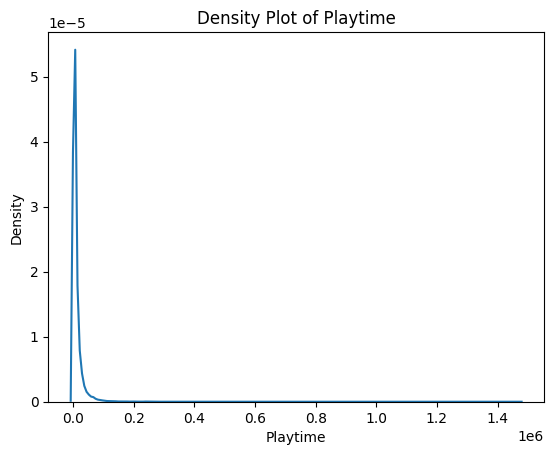

In [8]:
import seaborn as sns

sns.kdeplot(data=df, x='author_playtime_forever')
plt.xlabel('Playtime')
plt.ylabel('Density')
plt.title('Density Plot of Playtime')
plt.show()


nem é viciante = it's not even addictive
<br> lol...

In [9]:
df[df['author_playtime_forever_hours']> 20000]

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,created_date,playtime_bins,author_playtime_forever_hours
47796,141789960,english,nem é viciante,2023-07-10 23:55:11,True,0,0,True,False,False,503,16,1470929,2418,1275576,2024-02-01 16:31:21,2023-07-10,Bin 5,24515.483333


In [13]:
from astrapy.db import AstraDB
from langchain_community.llms import OpenAI
from langchain.vectorstores.cassandra import Cassandra
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_astradb import AstraDBVectorStore

from langchain_community.vectorstores import AstraDB
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings

from datasets import load_dataset


llm = OpenAI(openai_api_key=OPENAI_API_KEY)
myEmbeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

vstore = AstraDBVectorStore(
    embedding=myEmbeddings,
    collection_name="gta_reviews",
    token=ASTRA_DB_TOKEN,
    api_endpoint=ASTRA_DB_API_ENDPOINT,
)

df = df.sample(1000)

docs = []

for index, row in df.iterrows():
    review_text = row['review']
    author_playtime_forever_hours = row['author_playtime_forever_hours']
    votes_up = row['votes_up']
    comment_count = row['comment_count']
    # Additional fields as necessary

    # Generate an embedding for the review text
    #embedding = myEmbeddings.create_embeddings([review_text])

    # Create a document with the review and its metadata
    doc = Document(
        page_content=review_text,
        metadata={
            'author_playtime_forever_hours': author_playtime_forever_hours,
            'votes_up': votes_up,
            'comment_count': comment_count,
            # Add additional metadata as necessary
        }
    )
    docs.append(doc)
    # Index the document in your vector database
    #doc = Document(page_content=doc, metadata=metadata)

# Insert documents into the vector database
inserted_ids = vstore.add_documents(docs)
print(f"\nInserted {len(inserted_ids)} documents.")


Inserted 1000 documents.
